In [1]:
from IPython.core.pylabtools import figsize
import numpy as np
from numpy.random import dirichlet
from matplotlib import pyplot as plt
from scipy.stats import beta, ttest_rel
%matplotlib inline
figsize(12, 4)

In [4]:
visitors_to_A = 1275
visitors_to_B = 1300

conversions_from_A = 22
conversions_from_B = 12

alpha_prior = 1
beta_prior = 1

posterior_A = beta(alpha_prior + conversions_from_A,
                                      beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B,
                                      beta_prior + visitors_to_B - conversions_from_B)

In [5]:
samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)

In [6]:
def _hist(data, label, **kwargs):
    return plt.hist(data, bins=40, histtype='stepfilled',
                   alpha=.95, label=label, **kwargs)

両サイトのコンバージョン率の事後分布

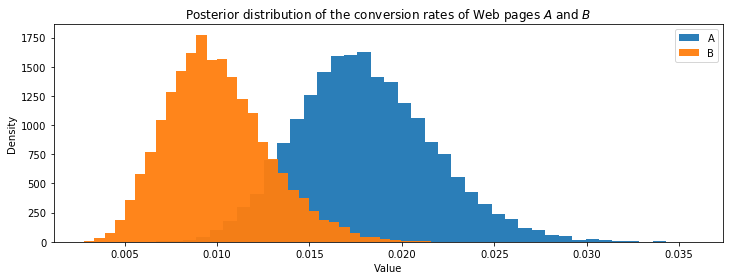

In [10]:
_hist(samples_posterior_A, 'A')
_hist(samples_posterior_B, 'B')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distribution of the conversion rates "
                 "of Web pages $A$ and $B$")
plt.legend()

ペア毎の相対的な増加量

In [11]:
def relative_increase(a, b):
    return (a - b ) / b

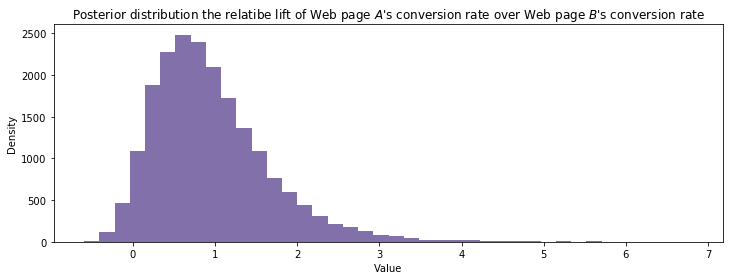

In [34]:
posterior_rel_increase = relative_increase(samples_posterior_A, 
                                                                              samples_posterior_B)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distribution the relatibe lift of "
                 "Web page $A$'s conversion rate over "
                 "Web page $B$'s conversion rate")
_hist(posterior_rel_increase, 'relative increase ', color='#7A68A6')
plt.show()

In [16]:
print((posterior_rel_increase > 0.2).mean())
print((posterior_rel_increase > 0.5).mean())

0.8916
0.72045


悪い例

In [32]:
print("bad increase rate = %.3f" % 
      ((samples_posterior_A.mean() - samples_posterior_B.mean()) / samples_posterior_B.mean()))

bad increase rate = 0.807


相対増加量の事後分布の平均、中央値、30パーセントタイル

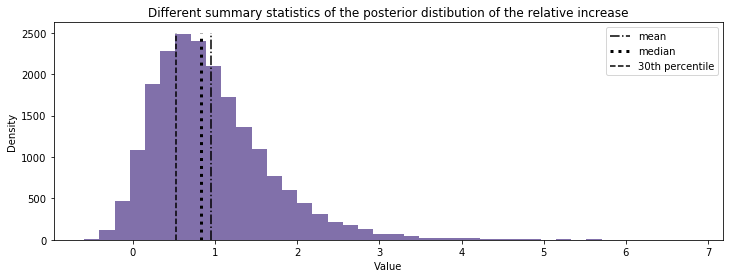

In [35]:
mean = posterior_rel_increase.mean()
median = np.percentile(posterior_rel_increase, 50)
conservative_percentile = np.percentile(posterior_rel_increase, 30)

_hist(posterior_rel_increase, '', color='#7A68A6')

plt.vlines(mean, 0, 2500,
                  linestyles='-.', label='mean')
plt.vlines(median, 0, 2500,
                  linestyles=':', label='median', lw=3)
plt.vlines(conservative_percentile, 0, 2500,
                  linestyles='--', label='30th percentile')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Different summary statistics of '
                 "the posterior distibution of the relative increase")
plt.legend()
plt.show()